# Introduction


**What?** How to model a Multi-Layer Perceptron (MLP)



# Import modules

In [1]:
import torch.nn as nn
import torch.nn.functional as F

# Modelling a MLP

In [ ]:
"""
The multilayer perceptron structurally extends the simpler perceptron by grouping many perceptrons in a 
single layer and stacking multiple layers together. 

The advantages of Multi-layer Perceptron are:
Capability to learn non-linear models.
Capability to learn models in real-time (on-line learning) using partial fit.

The disadvantages of Multi-layer Perceptron (MLP) include:
MLP with hidden layers have a non-convex loss function.
MLP requires tuning a number of hyperparameters (No. of hidden neurons, layers, and iterations).
MLP is sensitive to feature scaling.
"""

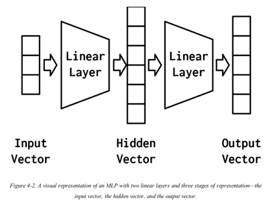

In [4]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """ Args:
        input_dim (int): the size of the input vectors
        hidden_dim (int): the output size of the first Linear layer output_dim (int): the output size of the second Linear layer
        """
        super(MultilayerPerceptron, self).__init__() 
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the MLP
        Args:
        x_in (torch.Tensor): an input data tensor
        x_in.shape should be (batch, input_dim) apply_softmax (bool): a flag for the softmax activation
        should be false if used with the cross-entropy losses Returns:
        the resulting tensor. tensor.shape should be (batch, output_dim) """
        intermediate = F.relu(self.fc1(x_in)) 
        output = self.fc2(intermediate)
        if apply_softmax:
            output = F.softmax(output, dim=1)
        return output        

In [ ]:
"""
Due to the generality of the MLP implementation, we can model inputs of any size. To demonstrate, we use an 
input dimension of size 3, an output dimension of size 4, and a hidden dimension of size 100. Notice how in 
the output of the print statement, the number of units in each layer nicely line up to produce an output of 
dimension 4 for an input of dimension 3.
"""

In [7]:
batch_size = 2 # number of samples input at once 
input_dim = 3
hidden_dim = 100
output_dim = 4

In [8]:
# Initialize model
mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim) 
print(mlp)

MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)


# References


- Rao, Delip, and Brian McMahan. Natural language processing with PyTorch: build intelligent language applications using deep learning. " O'Reilly Media, Inc.", 2019.
- https://github.com/joosthub/PyTorchNLPBook

